In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
train = datasets.MNIST("",
                       train=True,
                       download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))  
test = datasets.MNIST("",
                       train=False,
                       download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))  


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw



Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw



Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw



Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw
Processing...
Done!


In [4]:
trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [5]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

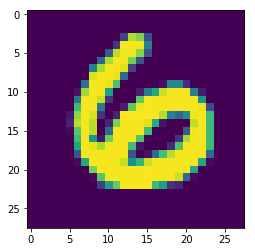

In [7]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))

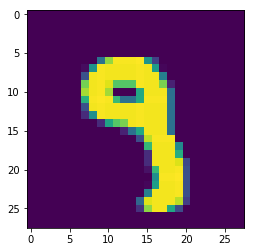

In [9]:
plt.imshow(data[0][1].view(28,28))

In [12]:
x,y= data[0][0],data[1][0]
print(y)

tensor(6)


In [15]:
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    xs,ys = data
    for y in ys:
        counter_dict[int(y)]+=1
        total+=1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [16]:
for i in counter_dict:
    print(f"[{i}:{counter_dict[i]/total*100}]")

[0:9.871666666666666]
[1:11.236666666666666]
[2:9.93]
[3:10.218333333333334]
[4:9.736666666666666]
[5:9.035]
[6:9.863333333333333]
[7:10.441666666666666]
[8:9.751666666666667]
[9:9.915000000000001]


### Modeling

In [17]:
import torch.nn as nn
import torch.nn.functional as F

In [22]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x,dim=1)
        
net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [23]:
X = torch.rand(28,28)

In [25]:
output = net(X.view(-1,28*28))

In [26]:
output

tensor([[-2.3716, -2.2903, -2.3920, -2.2548, -2.4082, -2.2962, -2.1598, -2.3536,
         -2.2770, -2.2489]], grad_fn=<LogSoftmaxBackward>)

### Optimization

In [27]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(),lr=0.001)
epochs = 3

for epocs in range(epochs):
    for data in trainset:
        # data is a batch of featuresets and labels
        X,y=data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss=F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0639, grad_fn=<NllLossBackward>)
tensor(0.0654, grad_fn=<NllLossBackward>)
tensor(0.3525, grad_fn=<NllLossBackward>)


In [28]:
print(torch.argmax(net(X[3].view(-1,784))[0]))

tensor(4)


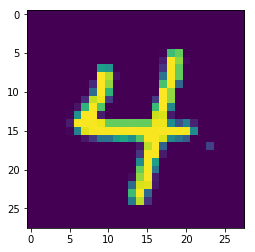

In [30]:
plt.imshow(X[3].view(28,28))
plt.show()

### Accuracy

In [31]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1

print("Accuracy:",round(correct/total,3))
            

Accuracy: 0.977


### CNN MOdel

In [36]:
import os 
import cv2
import numpy as np
from tqdm import tqdm
os.chdir(r"C:\kagglecatsanddogs_3367a")
# to rebuild the data once
# to avoid preprocessing of data
REBUILD_DATA = True

class DogsVsCats():
    
    '''
    Class DogsVsCats will create the required
    scale and size of images of cats and dogs.
    It will also assign the labels while processing
    the images and convert the pixels and labels
    into the array of images
    
    '''
    
    img_size = 50 #to make uniform size
    cats ="PetImages/Cat" # folder containing cat images
    dogs ="PetImages/Dog" # folder containing dog images
    labels = {cats:0,dogs:1} # labels for cats & dogs
    training_data = [] # training data list
    catcount=0 # initial count for cat
    dogcount=0 # initial count for dog
    
    def make_training_data(self):
         for label in self.labels:
             print(label)
             for f in tqdm(os.listdir(label)):
                 try:
                     path = os.path.join(label,f)
                     # converting img into grayscale
                     img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

                     # resize the image into 50x50 pixels
                     img = cv2.resize(img,(self.img_size,self.img_size))

                     # convert the image into a 2-D array
                     self.training_data.append([np.array(img),np.eye(2)[self.labels[label]]])

                     # count the number of cats & dogs
                     if label == self.cats:
                         self.catcount +=1
                     elif label == self.dogs:
                         self.dogcount +=1
                 except Exception  as e:
                     pass
        
         
         # once imported, shuffle the data 
         # save the file as numpy array file
        
         np.random.shuffle(self.training_data)
         np.save('training_data.npy',self.training_data)
         print("cats:",self.catcount)
         print('dogs',self.dogcount)
         
if REBUILD_DATA:
         dogsvscats = DogsVsCats()
         dogsvscats.make_training_data()

PetImages/Cat


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:20<00:00, 609.88it/s]


PetImages/Dog


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:21<00:00, 569.71it/s]


cats: 12476
dogs 12470


In [37]:
training_data = np.load("training_data.npy", allow_pickle=True)

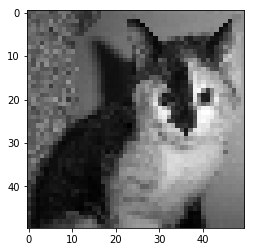

array([1., 0.])

In [45]:
# printing the image of the cat
plt.imshow(training_data[1][0],cmap = "gray")
plt.show()
# label of the image 1
training_data[1][1]